In [0]:
# !git config --global user.email "me@example.com"
# !git config --global user.name "nervuzz"
# !git commit -m 'Day 2'
# !git pull
# !git add .
# !git status
# !git push

In [1]:
cd "drive/My Drive/Colab Notebooks/data_workshop_tsr/"

/content/drive/My Drive/Colab Notebooks/data_workshop_tsr


In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
train = pd.read_pickle('data/train.p')
train.keys()

dict_keys(['coords', 'labels', 'features', 'sizes'])

In [4]:
# X_train -> images
# y_train -> meaning
X_train, y_train = train['features'], train['labels']
X_train.shape, y_train.shape

((34799, 32, 32, 3), (34799,))

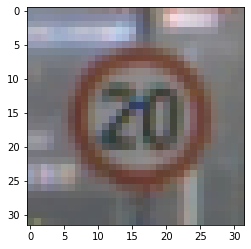

In [0]:
plt.imshow(X_train[10000])

In [7]:
signs = pd.read_csv('data/signnames.csv')
signs.head()

,a,b
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)


In [42]:
dict_signs = signs.to_dict()['b']
dict_signs[19], dict_signs[10], dict_signs[7]

('Dangerous curve to the left',
 'No passing for vehicles over 3.5 metric tons',
 'Speed limit (100km/h)')

In [0]:
# How many 'Beware of ice/snow' (id) images do we have?
len([x for x in y_train if x == 30]) # 390

# or using bit masking (X_train and y_train are ndarrays of the same size)
X_train[ y_train == 30 ].shape # obviously 390 as well

(390, 32, 32, 3)

Speed limit (20km/h)


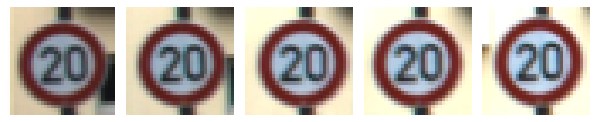

Speed limit (30km/h)


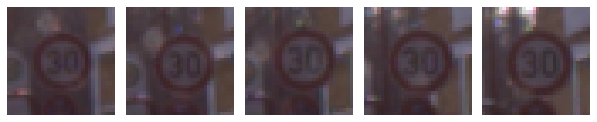

Speed limit (50km/h)


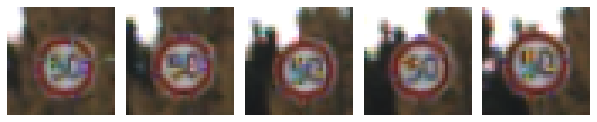

Speed limit (60km/h)


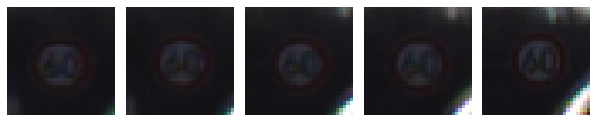

Speed limit (70km/h)


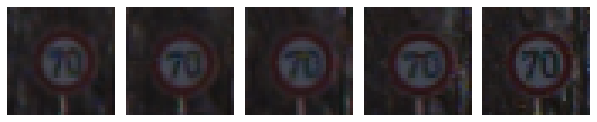

Speed limit (80km/h)


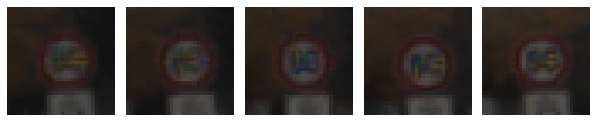

End of speed limit (80km/h)


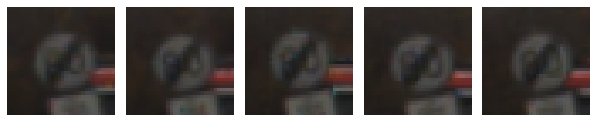

Speed limit (100km/h)


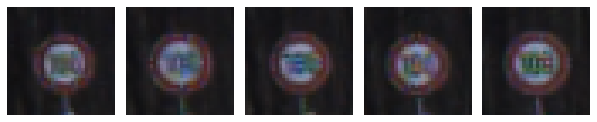

Speed limit (120km/h)


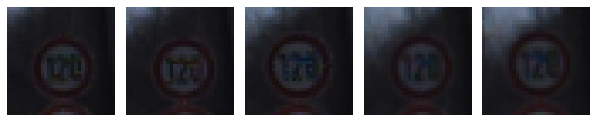

No passing


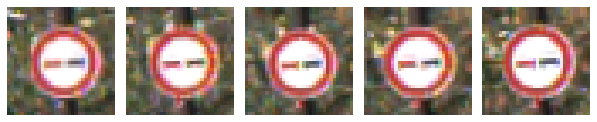

No passing for vehicles over 3.5 metric tons


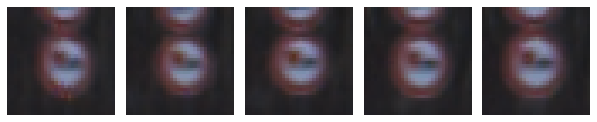

Right-of-way at the next intersection


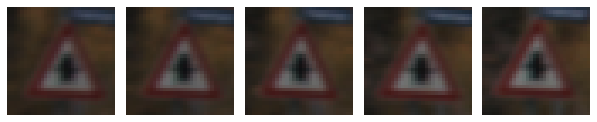

Priority road


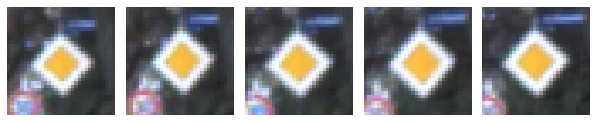

Yield


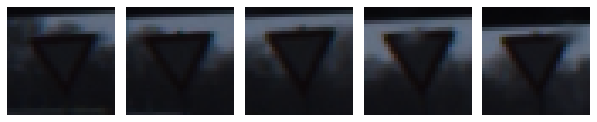

Stop


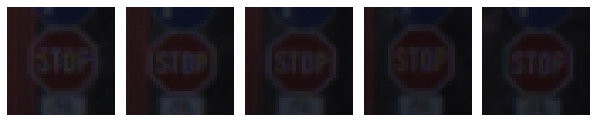

No vehicles


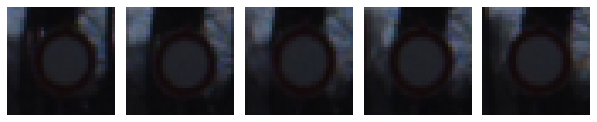

Vehicles over 3.5 metric tons prohibited


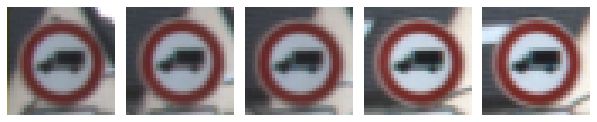

No entry


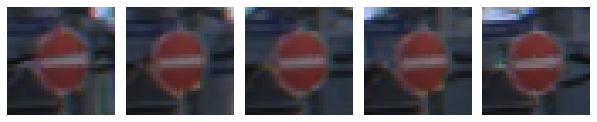

General caution


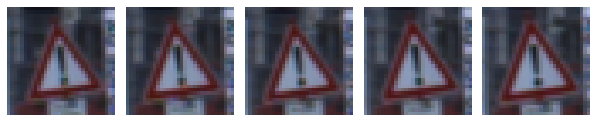

Dangerous curve to the left


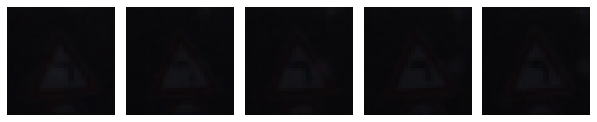

Dangerous curve to the right


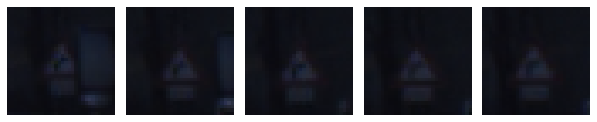

Double curve


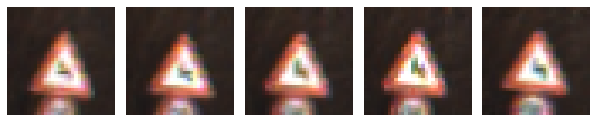

Bumpy road


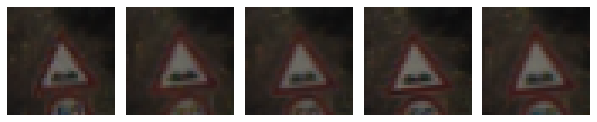

Slippery road


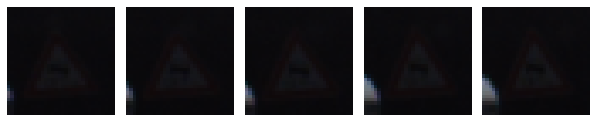

Road narrows on the right


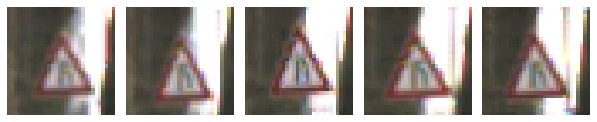

Road work


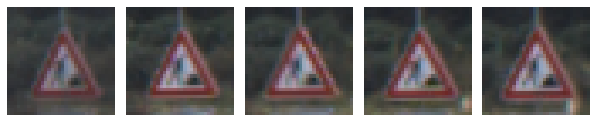

Traffic signals


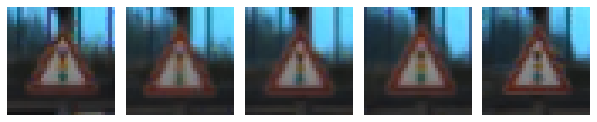

Pedestrians


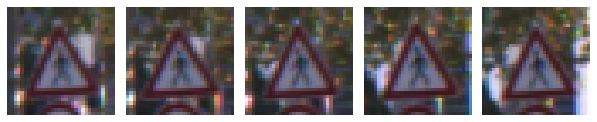

Children crossing


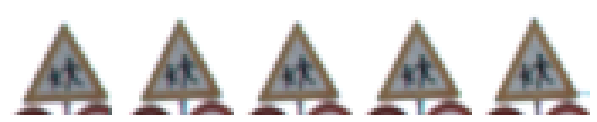

Bicycles crossing


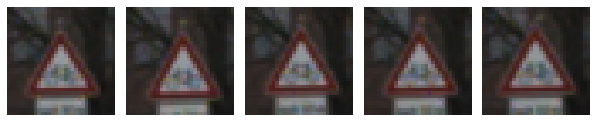

Beware of ice/snow


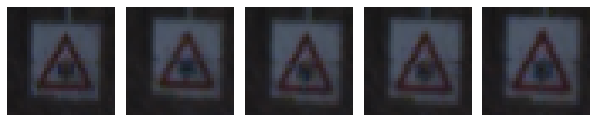

Wild animals crossing


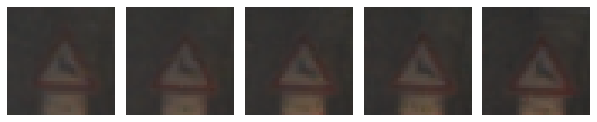

End of all speed and passing limits


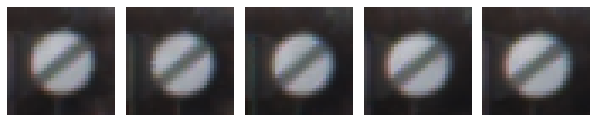

Turn right ahead


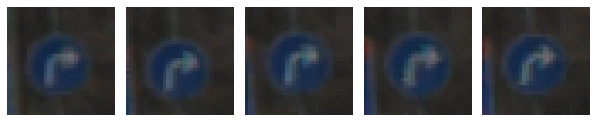

Turn left ahead


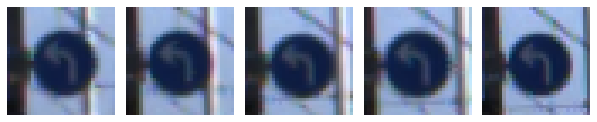

Ahead only


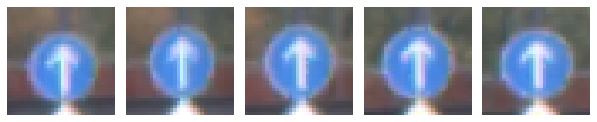

Go straight or right


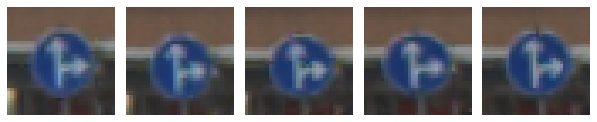

Go straight or left


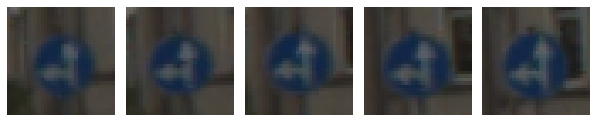

Keep right


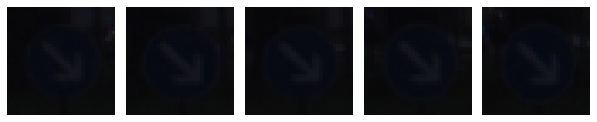

Keep left


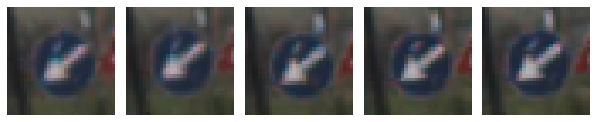

Roundabout mandatory


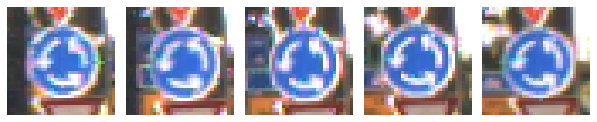

End of no passing


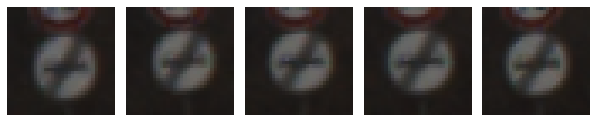

End of no passing by vehicles over 3.5 metric tons


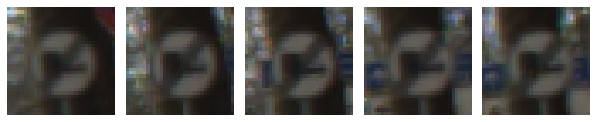

In [22]:
for id_sign, name_sign in dict_signs.items():
  given_signs = X_train[y_train == id_sign]

  plt.figure(figsize=(15,5))
  for i in range(5):
    if i == 0:
      print(name_sign)
    plt.subplot(f'19{i+1}')
    plt.imshow(given_signs[i])
    plt.axis('off')
  
  plt.tight_layout()
  plt.show()

In [0]:
# from collections import Counter
# cnt = Counter(y_train).most_common()
# a,b = zip(*cnt)
# ids = range(len(a))
# labels = [dict_signs[a[id_]] for id_ in a]
# a[0] #-> 2
# id_ = 2
# a[id_] # -> 13
# dict_signs[13] # -> 'Yield' which is a mistake (we have list here, not dict)

In [0]:
df = pd.DataFrame.from_dict(y_train)
df.groupby(0).size()
# df.rename(columns={0: 'label_id'},inplace=True)
# df = df.assign(label_name=df.label_id)
df[0] = df[0].apply(lambda x: dict_signs[x])

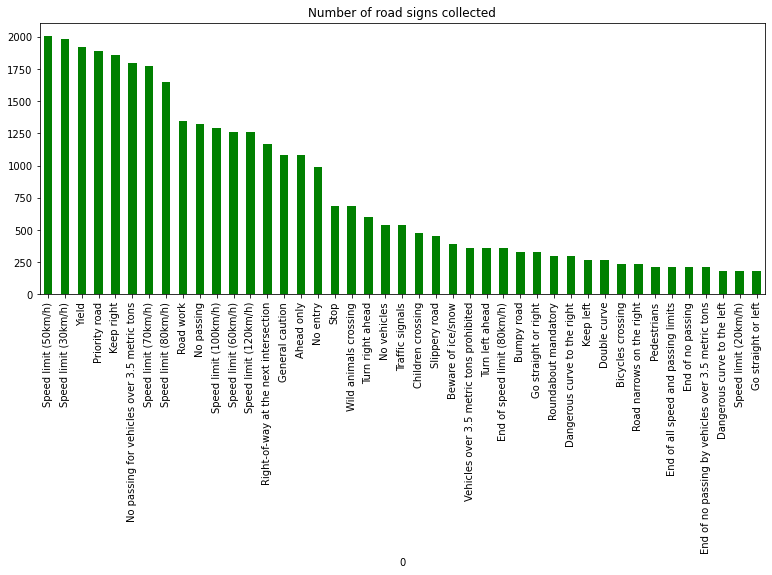

In [53]:
df_groupped = df.groupby(0).size()

df_groupped.sort_values(ascending=False).plot.bar(
    color='Green', figsize=(13,5), title='Number of road signs collected')

In [0]:
# !git commit -m 'Day 2'
!git pull
# !git add .
# !git status
# !git push